In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/josh/Downloads/yes/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/josh/Downloads/yes/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/josh/Downloads/yes/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDepreca

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.6 pynndescent==0.5.10


/home/josh/Downloads/yes/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
results_file = '/home/josh/write/bcts'

In [4]:
adata = sc.read("/home/josh/Downloads/trm_counts.tsv", delimiter='\t', cache=True)

... reading from cache file cache/home-josh-Downloads-trm_counts.h5ad


In [5]:
adata = adata.T

In [6]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [7]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACCTGCAAACAACA-1, AAACCTGCACTACAGT-1, AAACCTGCAGCTGGCT-1, AAACCTGGTGAGCGAT-1, AAACCTGGTTATGCGT-1, AAACCTGTCAAAGACA-1, AAACGGGAGTGCCAGA-1, AAACGGGCAGCTTAAC-1, AAACGGGCAGTACACT-1, AAACGGGCATACAGCT-1, AAACGGGGTAGTACCT-1, AAACGGGGTTGCTCCT-1, AAACGGGTCACTCTTA-1, AAAGATGAGGGTTCCC-1, AAAGATGCACATCTTT-1, AAAGATGCACGCTTTC-1, AAAGATGCAGCGTCCA-1, AAAGATGCAGTTCATG-1, AAAGATGGTCAACTGT-1, AAAGATGGTCTGATCA-1, AAAGATGTCACCGTAA-1, AAAGATGTCCACGTGG-1, AAAGCAAAGATATGCA-1, AAAGCAACAGCGTCCA-1, AAAGCAAGTAACGTTC-1, AAAGCAAGTTTCCACC-1, AAAGCAATCATGTCCC-1, AAAGCAATCGTAGGTT-1, AAAGTAGCAGCTTAAC-1, AAAGTAGCATTCCTGC-1, AAAGTAGCATTTGCTT-1, AAAGTAGGTAGCGTGA-1, AAAGTAGGTATGAATG-1, AAAGTAGGTGACAAAT-1, AAAGTAGGTGACTACT-1, AAAGTAGGTTATGTGC-1, AAAGTAGTCAGGTTCA-1, AAAGTAGTCTGCAAGT-1, AAATGCCGTCTAACGT-1, AAATGCCTCCTAAGTG-1, AAATGCCTCTGGTTCC-1, AACACGTAGACCTAGG-1, AACACGTAGTGGGTTG-1, AACACGTCACCGCTAG-1, AACACGTCAGCTCCGA-1, AACACGTTCTTGTCAT-1, AACCATGGTCTCTCGT-1, AACCATGTCTGATACG-1, AACCGCGAGGTGCTTT-1, AACGTTGAGTTATCGC-1, AACGTTGCACCAACCG-1, AACGTTGCATATACGC-1, AACGTTGGTAGGAGTC-1, AACGTTGTCACGCGGT-1, AACTCAGAGTGCGTGA-1, AACTCAGCAATCTACG-1, AACTCAGCAGGAATCG-1, AACTCCCGTTACGACT-1, AACTCCCTCAAGATCC-1, AACTCCCTCAGCTCGG-1, AACTCTTCAATGGATA-1, AACTCTTCAGCGTAAG-1, AACTCTTTCCCATTTA-1, AACTGGTAGCTTATCG-1, AACTGGTCAAATACAG-1, AACTGGTTCGTCACGG-1, AACTGGTTCTCTGTCG-1, AACTTTCAGCCGCCTA-1, AACTTTCAGTACTTGC-1, AACTTTCAGTGGCACA-1, AACTTTCAGTGTCTCA-1, AACTTTCTCAATAAGG-1, AAGACCTCACAGACTT-1, AAGACCTGTCTCGTTC-1, AAGACCTTCTTGCATT-1, AAGCCGCAGATCCTGT-1, AAGCCGCAGCCATCGC-1, AAGCCGCAGCGAAGGG-1, AAGCCGCAGCTCCCAG-1, AAGCCGCAGGGTGTGT-1, AAGCCGCCACAGCCCA-1, AAGCCGCCATGTAAGA-1, AAGCCGCCATGTCTCC-1, AAGCCGCGTATCAGTC-1, AAGCCGCGTCGGCTCA-1, AAGCCGCGTCTGCGGT-1, AAGCCGCTCCAGTAGT-1, AAGCCGCTCCCTTGCA-1, AAGGAGCAGTATGACA-1, AAGGAGCTCATAACCG-1, AAGGCAGAGTAGATGT-1, AAGGCAGCATGCTGGC-1, AAGGTTCAGGGAAACA-1, AAGGTTCCAAGCGTAG-1, AAGGTTCTCTCCAGGG-1, AAGTCTGCATGCATGT-1, AAGTCTGGTGAGTATA-1, AATCCAGAGCACGCCT-1, AATCCAGAGCGATCCC-1, AATCCAGAGGTGACCA-1, ...]

[5759 rows x 0 columns]

normalizing counts per cell
    finished (0:00:01)


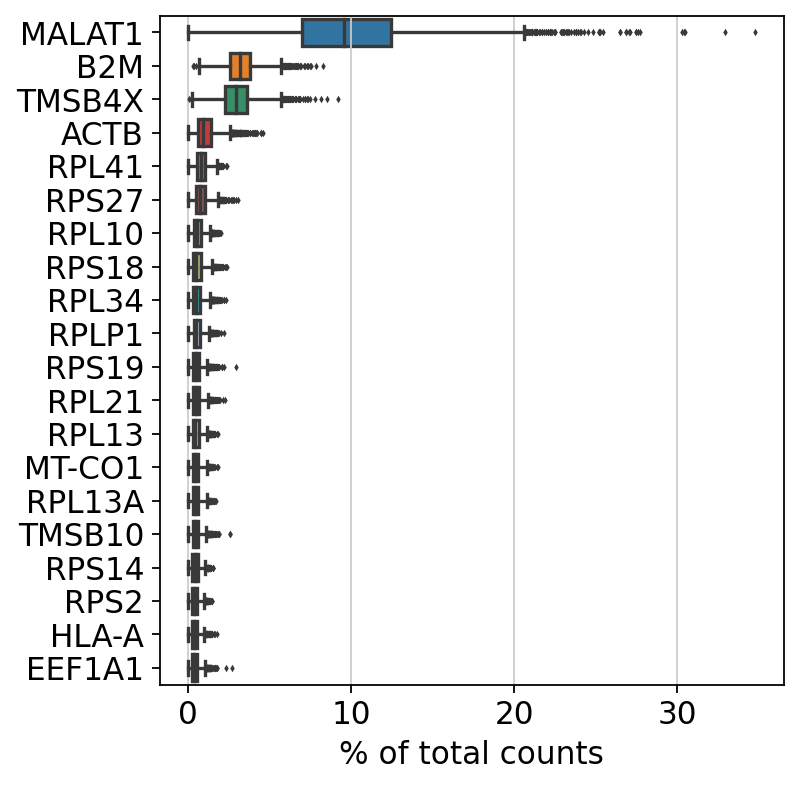

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [9]:

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 18540 genes that are detected in less than 3 cells


In [10]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

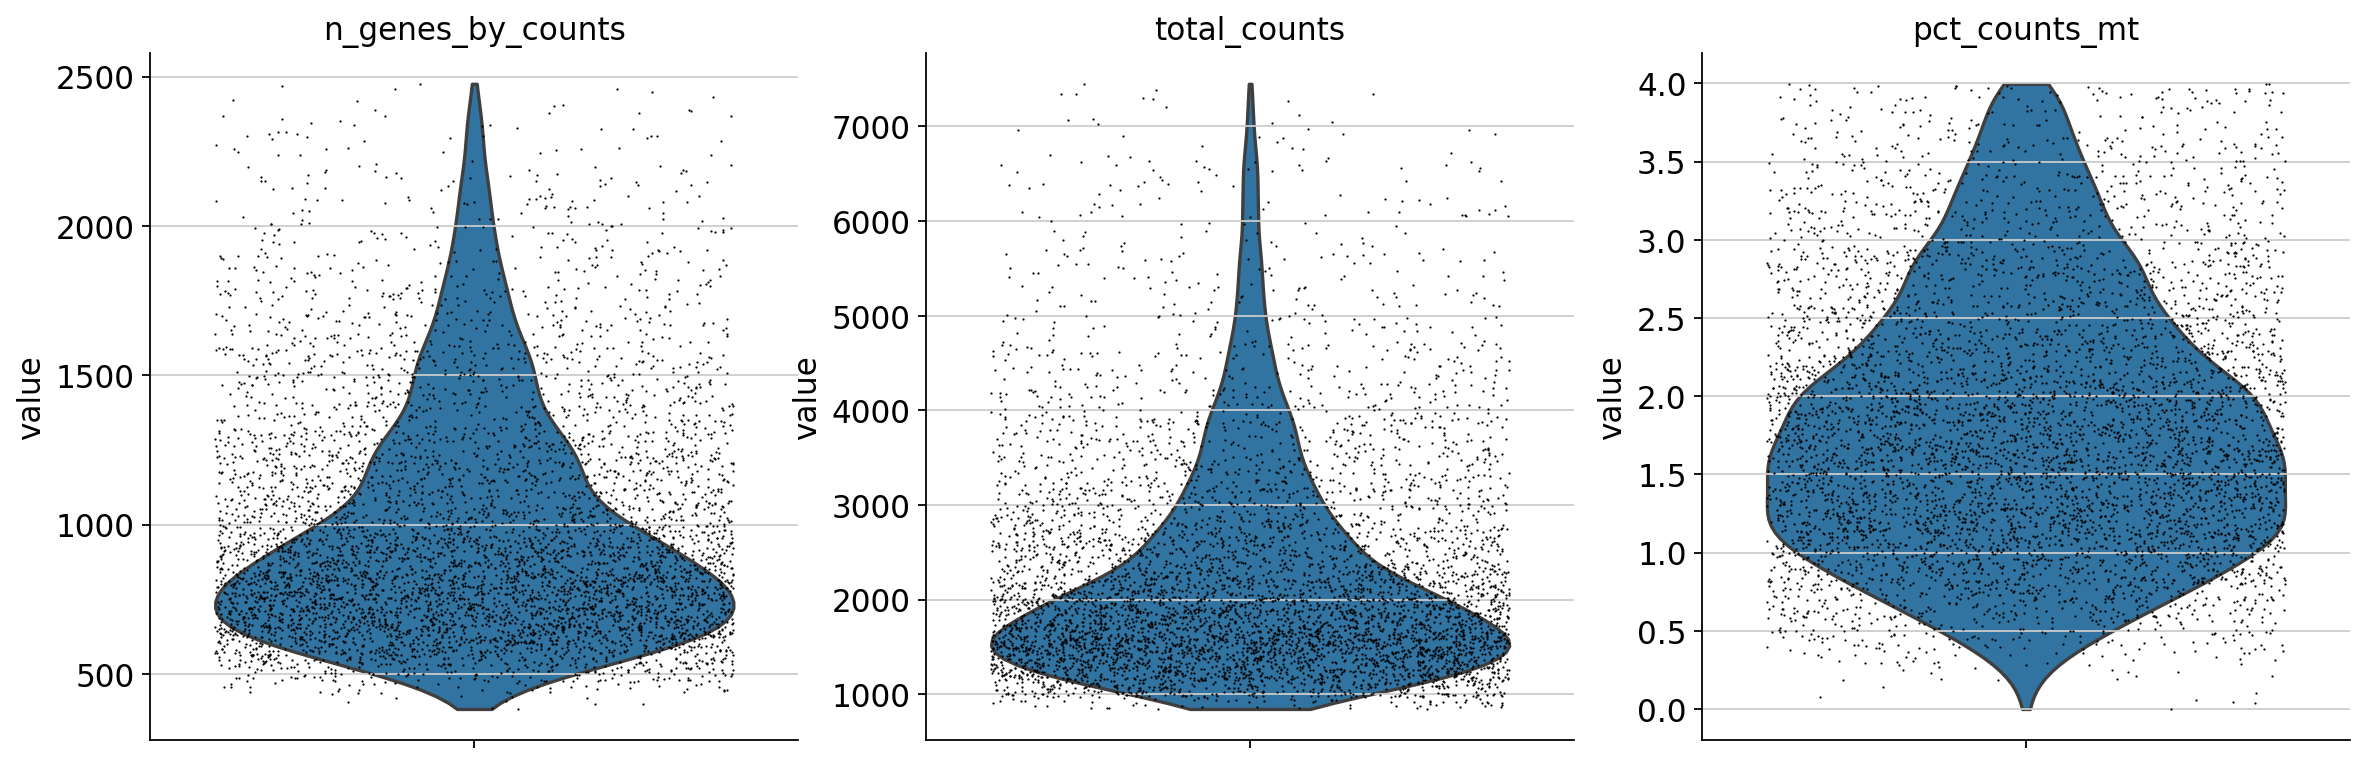

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

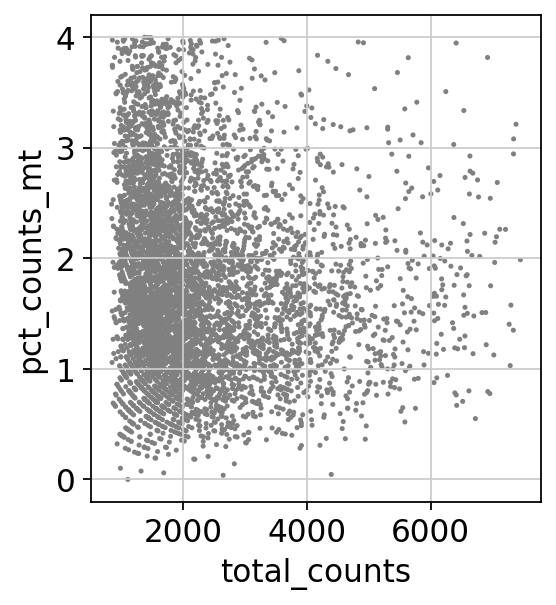

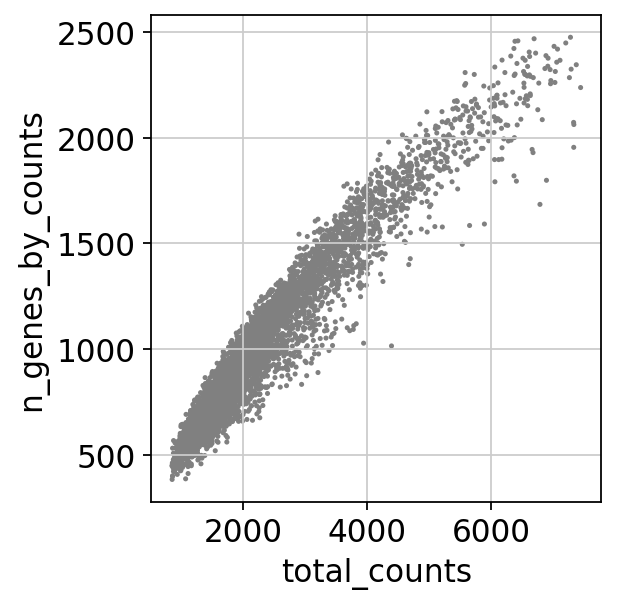

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [14]:
sc.pp.log1p(adata)

In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


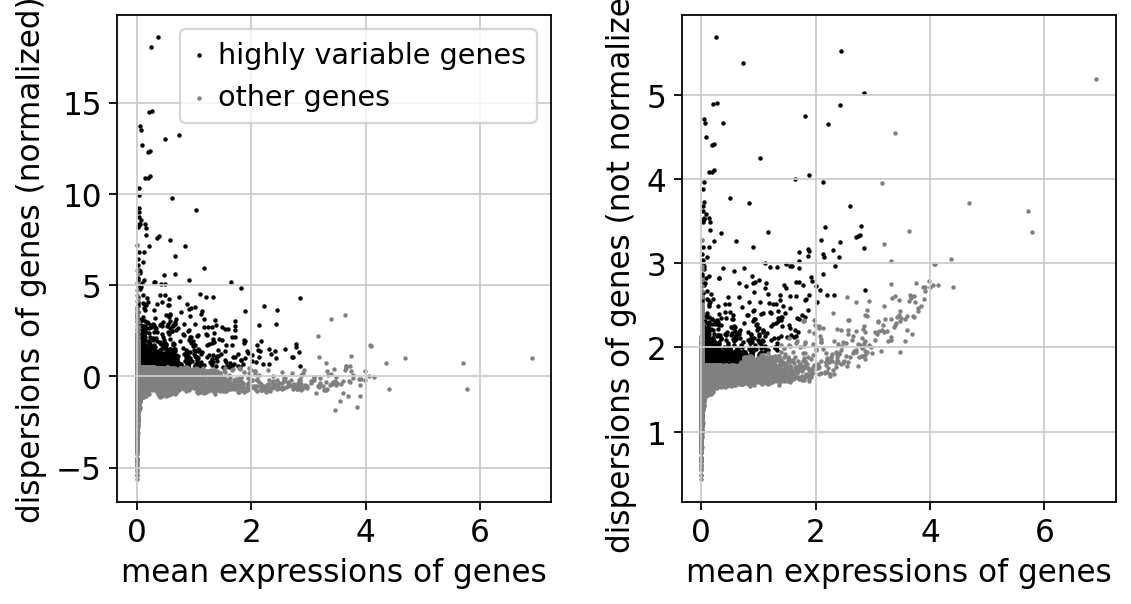

In [16]:
sc.pl.highly_variable_genes(adata)

In [17]:
adata.raw = adata

In [18]:
adata = adata[:, adata.var.highly_variable]

In [19]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:05)


In [20]:
sc.pp.scale(adata, max_value=10)

In [21]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


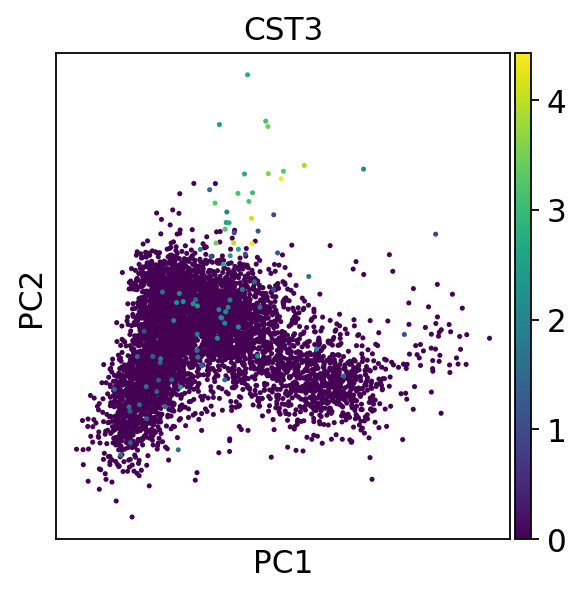

In [22]:
sc.pl.pca(adata, color='CST3')


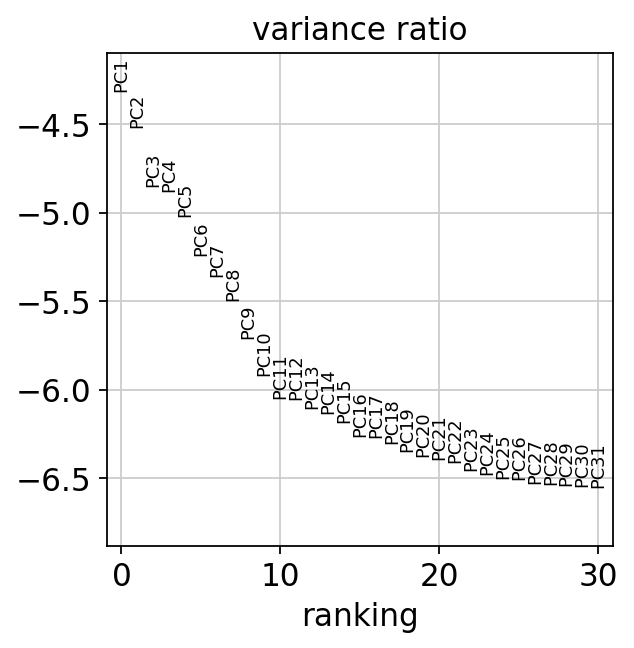

In [23]:
sc.pl.pca_variance_ratio(adata, log=True)

In [24]:
adata.write(results_file)


In [25]:
adata

AnnData object with n_obs × n_vars = 5759 × 1790
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [26]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [27]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


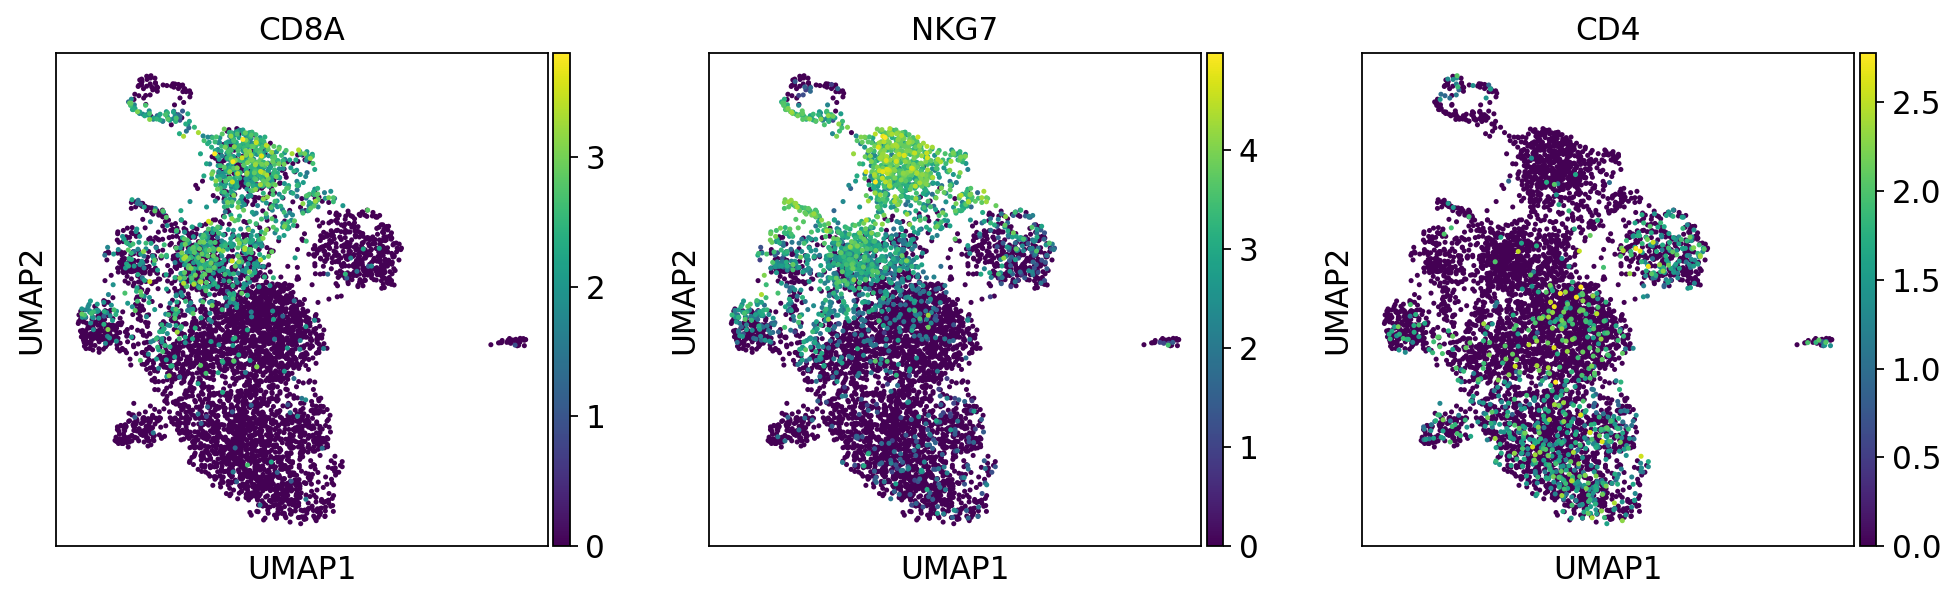

In [54]:
sc.pl.umap(adata, color=['CD8A', 'NKG7', 'CD4'])

In [29]:
sc.tl.leiden(adata)


running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


/home/josh/Downloads/yes/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


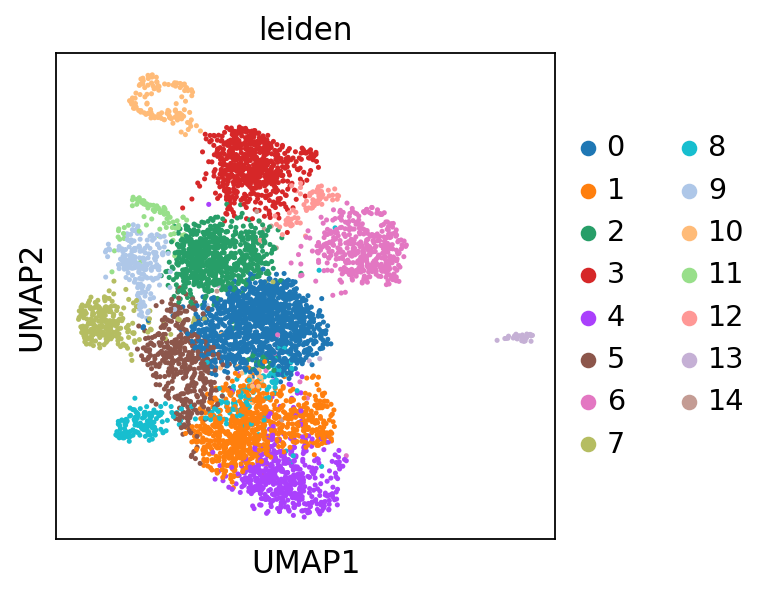

In [30]:
sc.pl.umap(adata, color=['leiden'])


In [31]:
adata.write(results_file)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


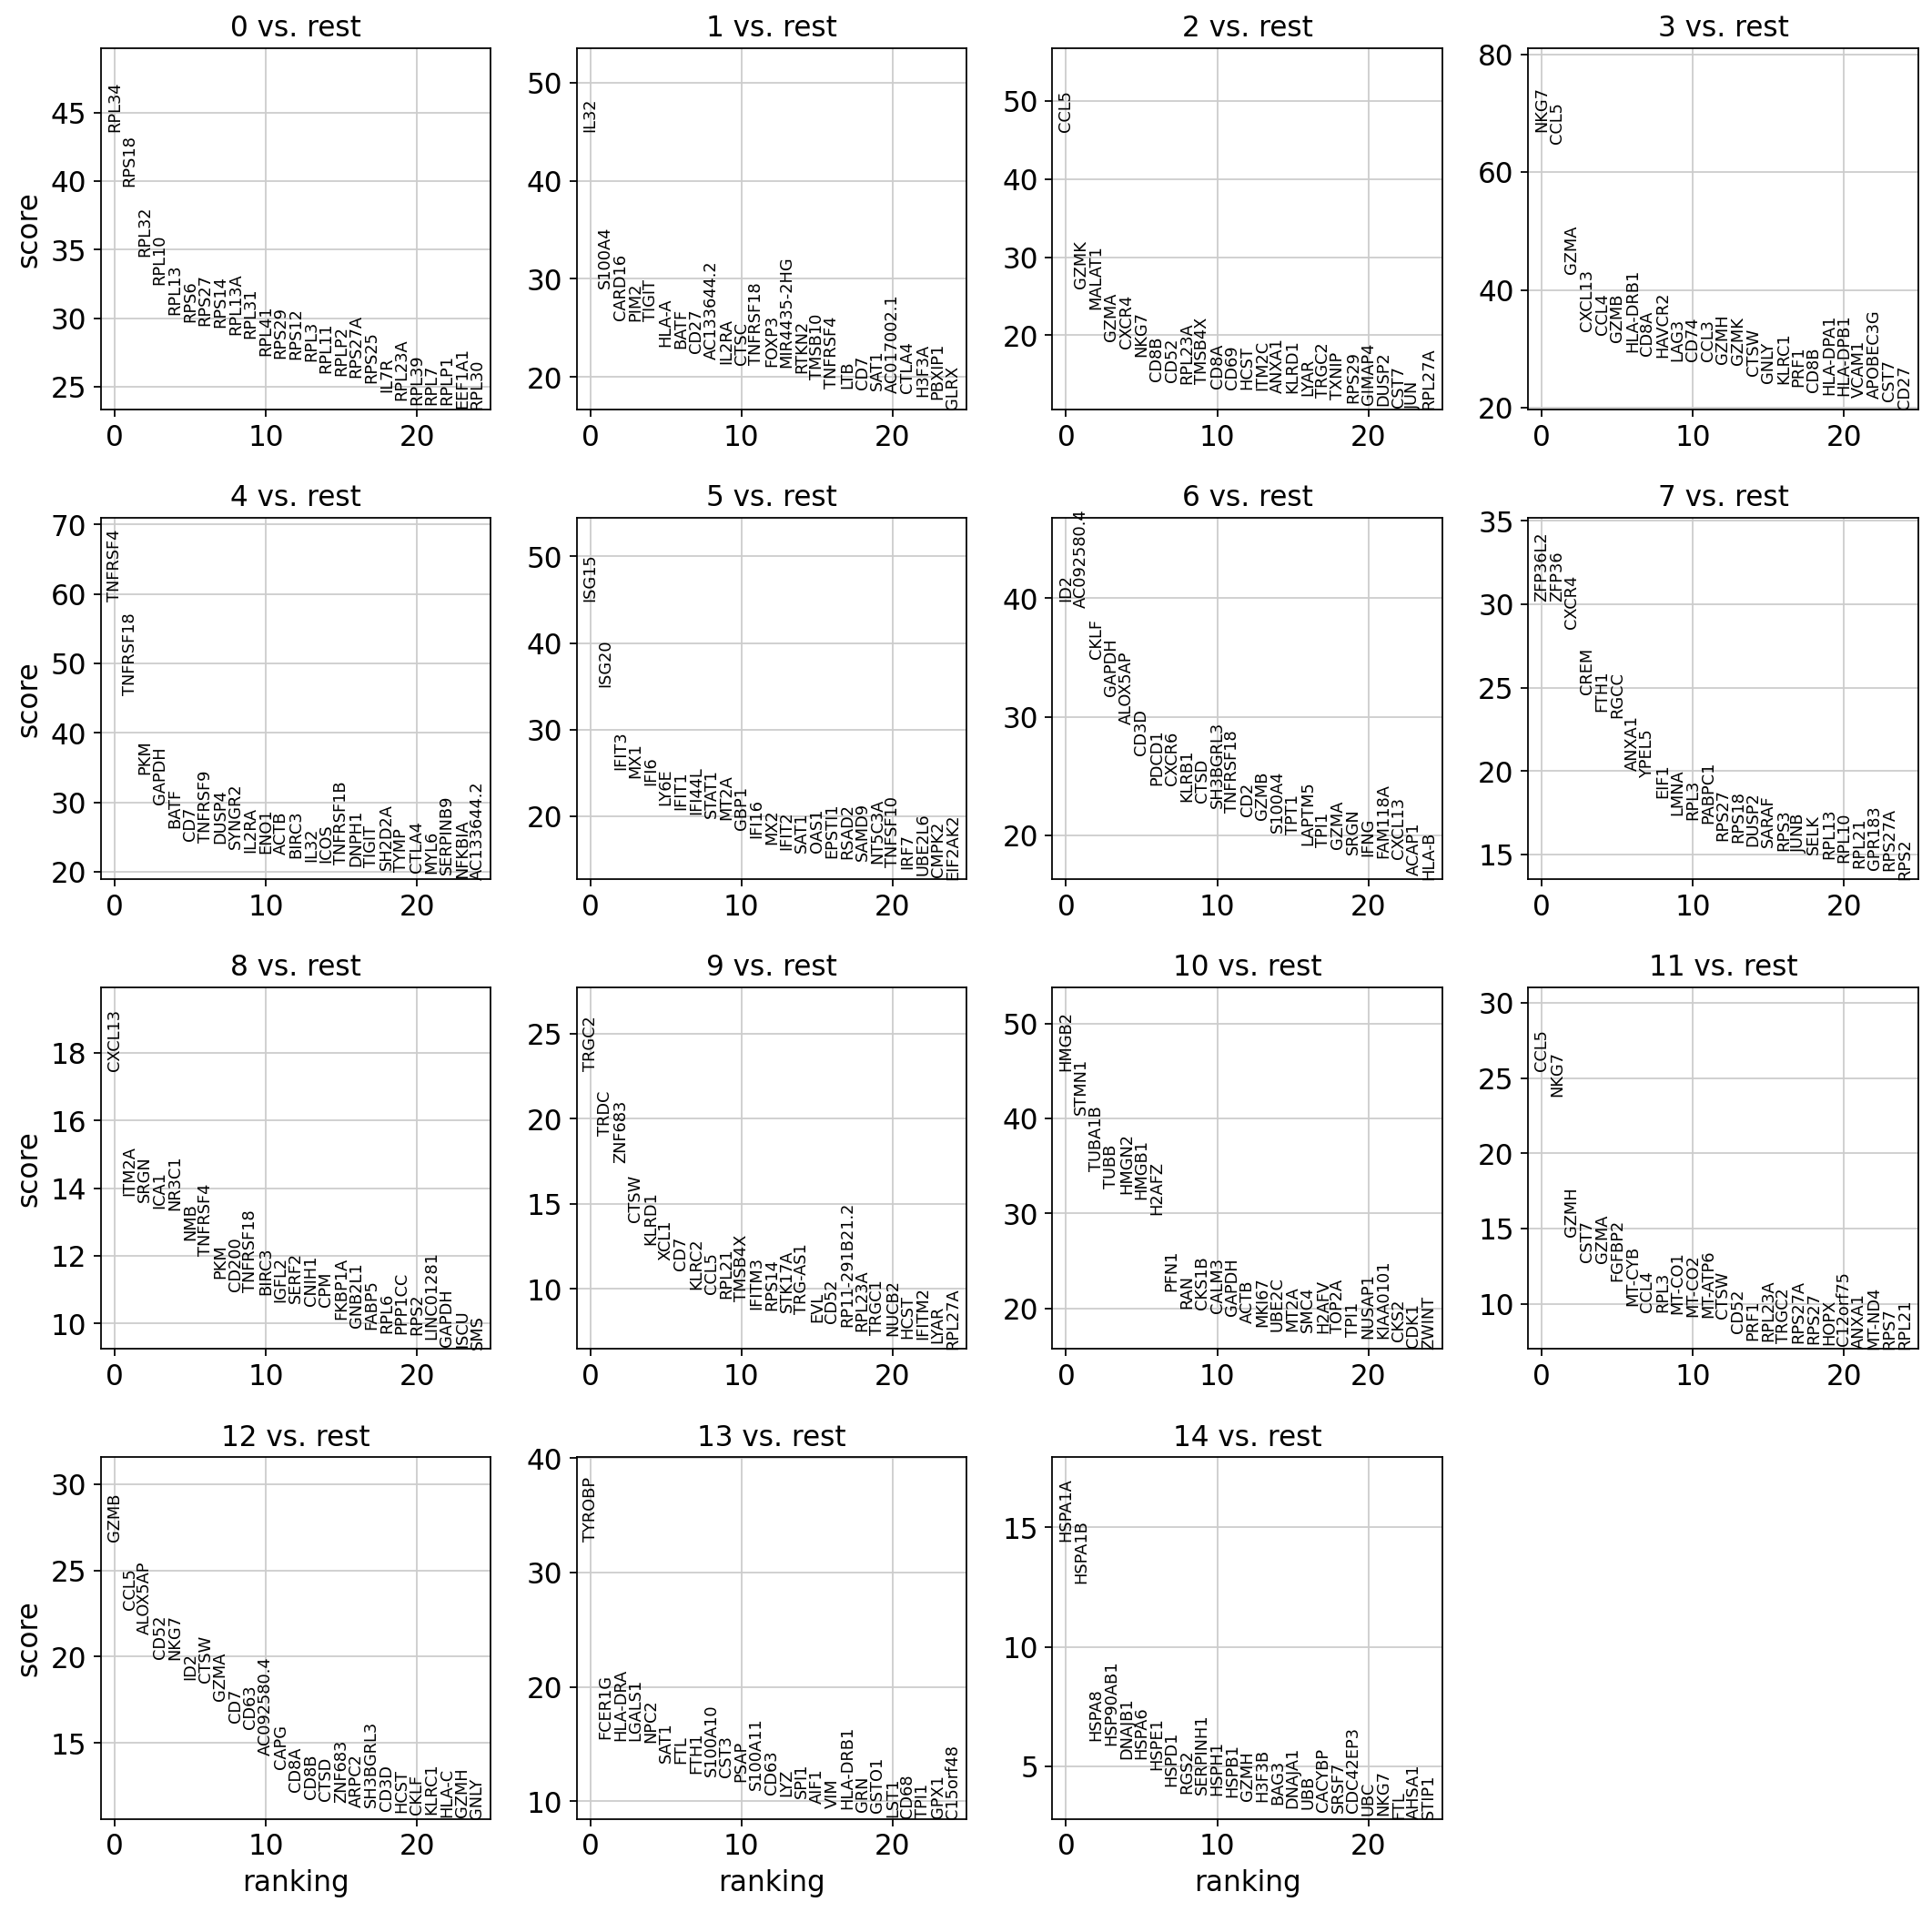

In [32]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [33]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:06)


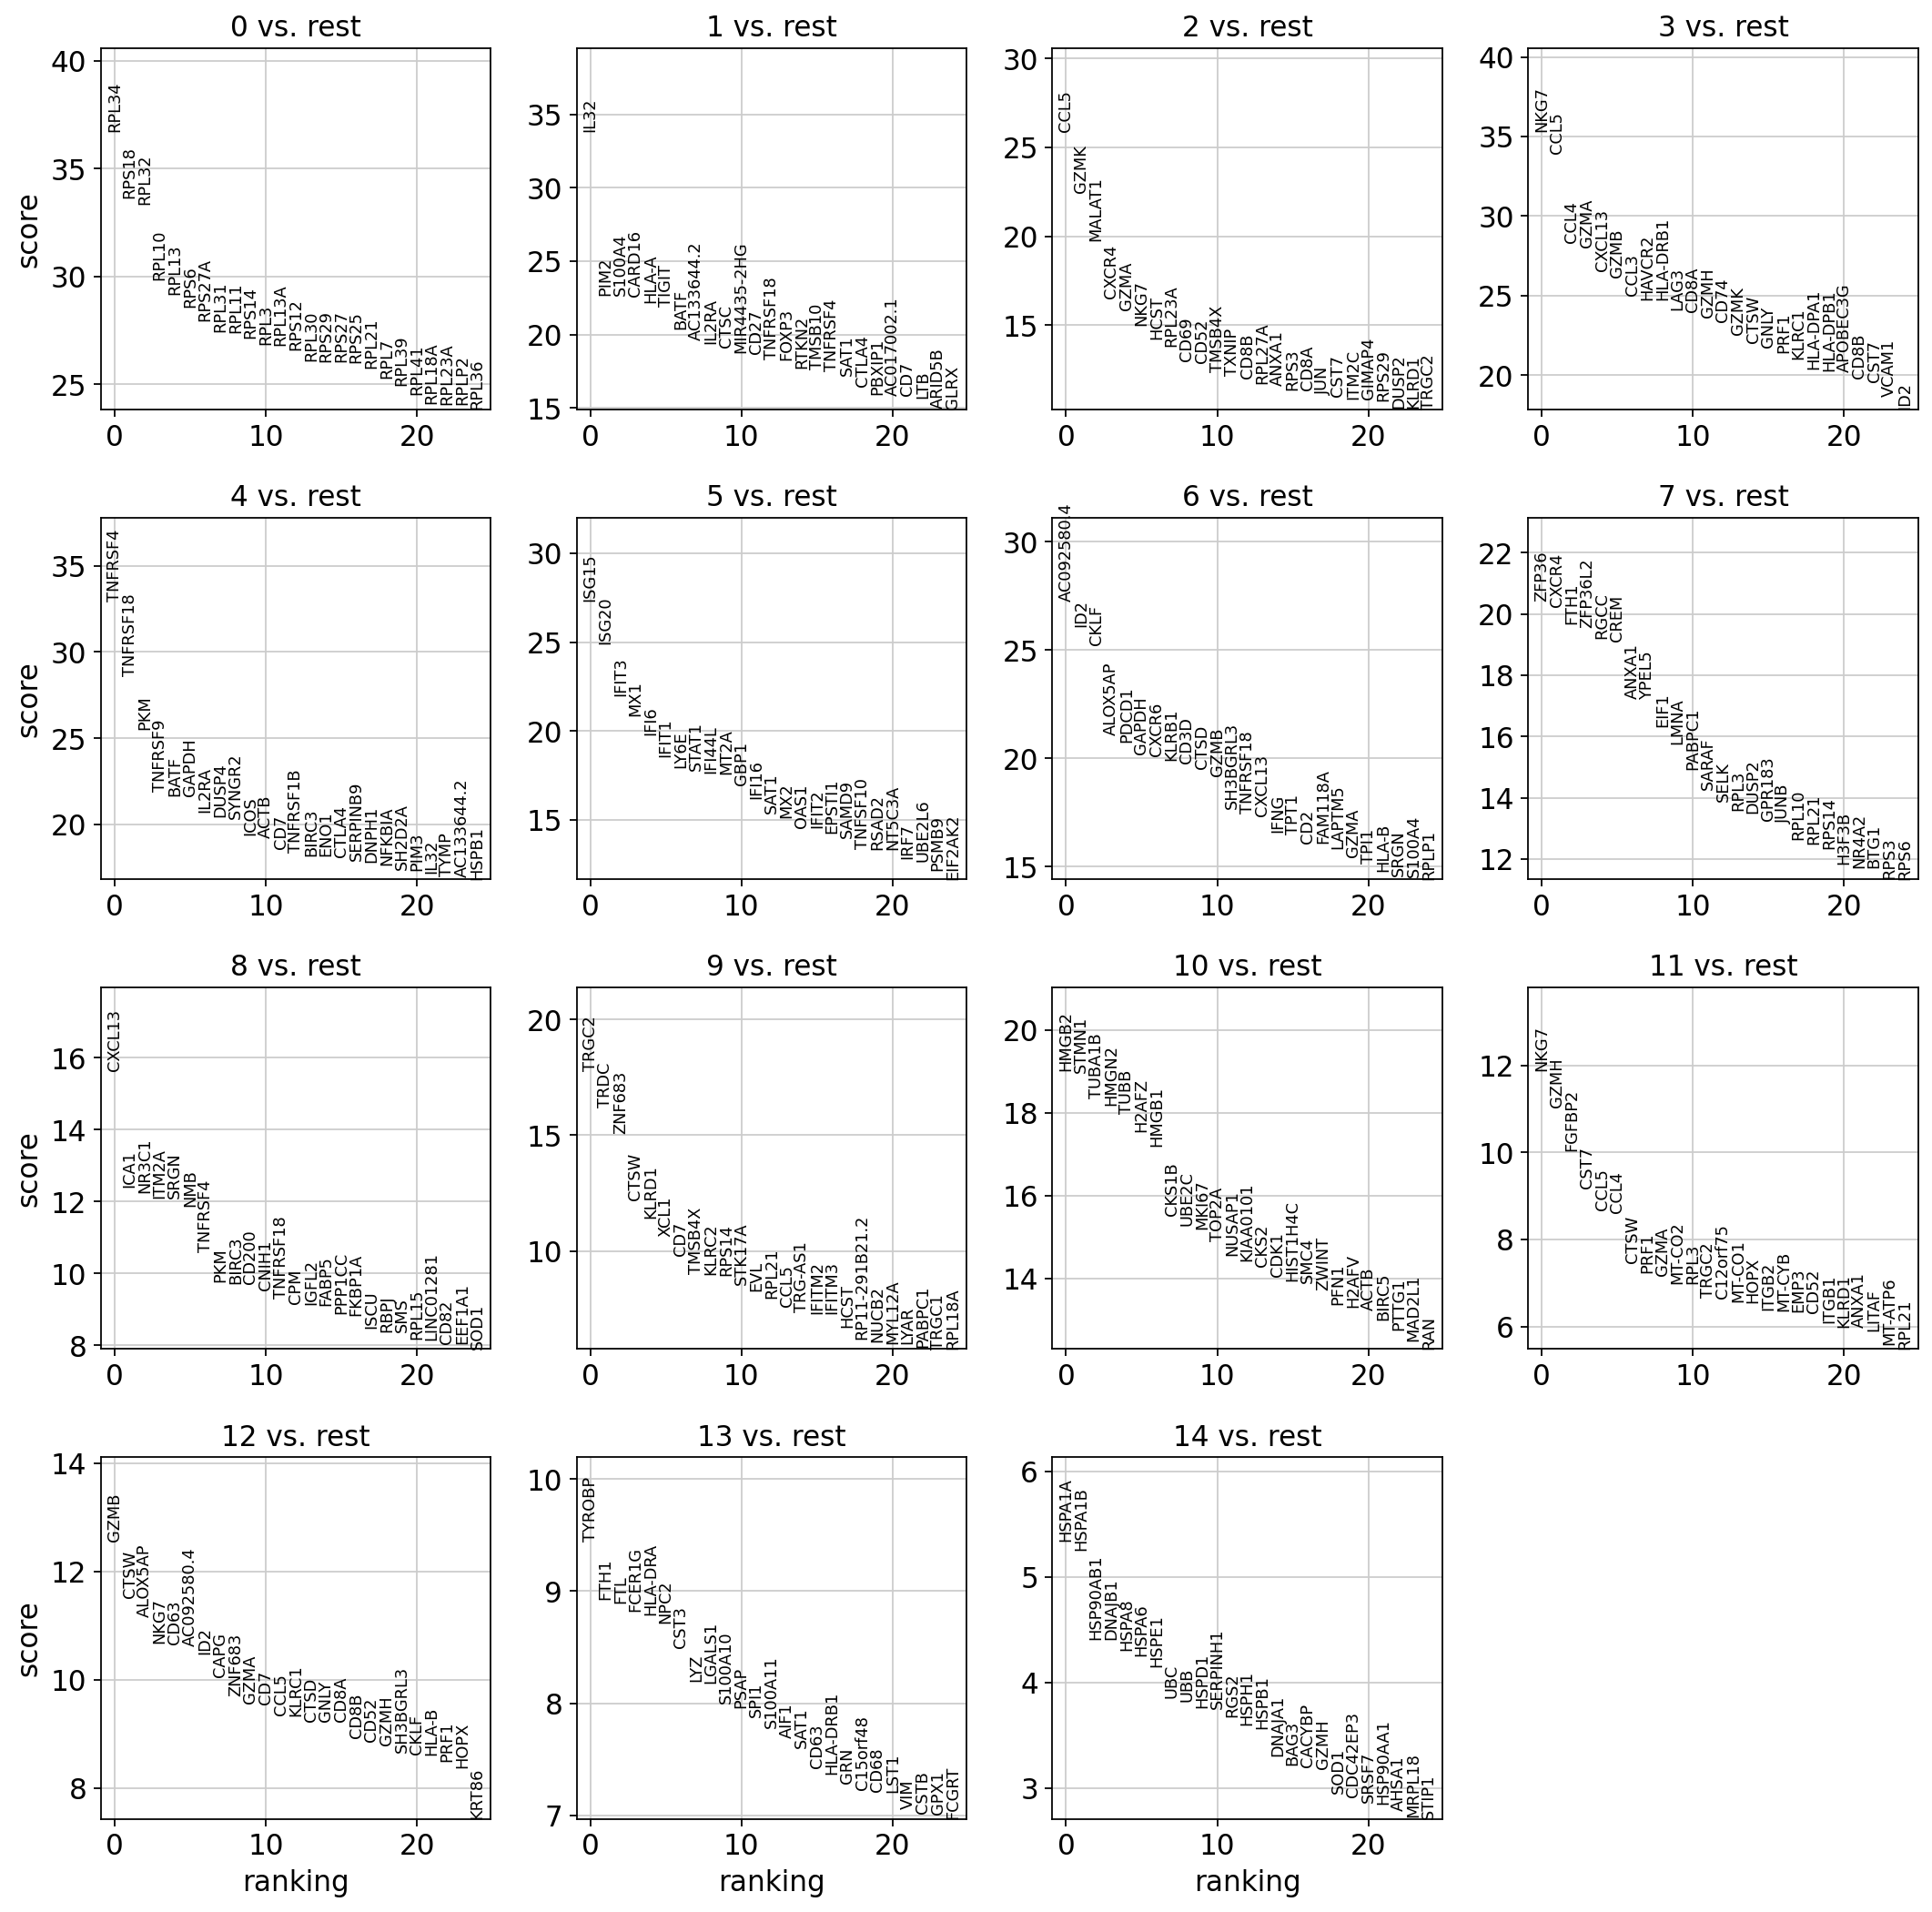

In [34]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [35]:
adata.write(results_file)

In [101]:
marker_genes = ['IL7R', 'IL32', 'PIM2', 'CCL5', 'GZMK', 'CD8A', 'CD8B', 'TRAC', 'CD14',
                'FCGR3A', 'MS4A7', 'CST3', 'TRDC', 'TYROBP', 'CCR5']

In [140]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head()


0
0   RPS18
1   RPL34
2  RPS27A
3   RPL32
4   RPS14

In [38]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n            0_p     1_n            1_p     2_n            2_p     3_n  \
0  RPL34  3.852585e-295    IL32  7.208178e-251    CCL5  7.966778e-148    NKG7   
1  RPS18  4.473600e-248    PIM2  6.110968e-114    GZMK  7.833457e-112    CCL5   
2  RPL32  1.696790e-243  S100A4  2.011775e-113  MALAT1   8.920813e-87    CCL4   
3  RPL10  7.769406e-196  CARD16  2.289172e-113   CXCR4   3.920169e-61    GZMA   
4  RPL13  5.586745e-187   HLA-A  7.493977e-109    GZMA   1.608316e-56  CXCL13   

             3_p       4_n            4_p  ...    10_n          10_p    11_n  \
0  4.639378e-273   TNFRSF4  7.065635e-238  ...   HMGB2  1.519028e-80    NKG7   
1  2.815684e-252  TNFRSF18  5.107009e-180  ...   STMN1  3.654809e-80    GZMH   
2  3.505812e-176       PKM  2.765465e-143  ...  TUBA1B  3.088395e-75  FGFBP2   
3  5.857971e-173   TNFRSF9  1.861920e-106  ...   HMGN2  8.640542e-74    CST7   
4  1.590066e-155      BATF  4.983832e-104  ...    TUBB  2.848353e-72    CCL5   

           11_p     12_n          12_p     13_n          13_p      14_n  \
0  1.667875e-32     GZMB  3.180455e-36   TYROBP  3.415640e-21    HSPA1A   
1  2.557855e-28     CTSW  1.094050e-30     FTH1  4.439997e-19    HSPA1B   
2  1.091731e-23  ALOX5AP  5.992381e-29      FTL  5.989546e-19  HSP90AB1   
3  3.971531e-20     NKG7  1.287567e-26   FCER1G  1.135029e-18    DNAJB1   
4  3.941264e-18     CD63  1.675253e-26  HLA-DRA  1.572960e-18     HSPA8   

           14_p  
0  9.064453e-08  
1  1.481946e-07  
2  1.028928e-05  
3  1.028928e-05  
4  1.670795e-05  

[5 rows x 30 columns]

ranking genes
    finished (0:00:01)


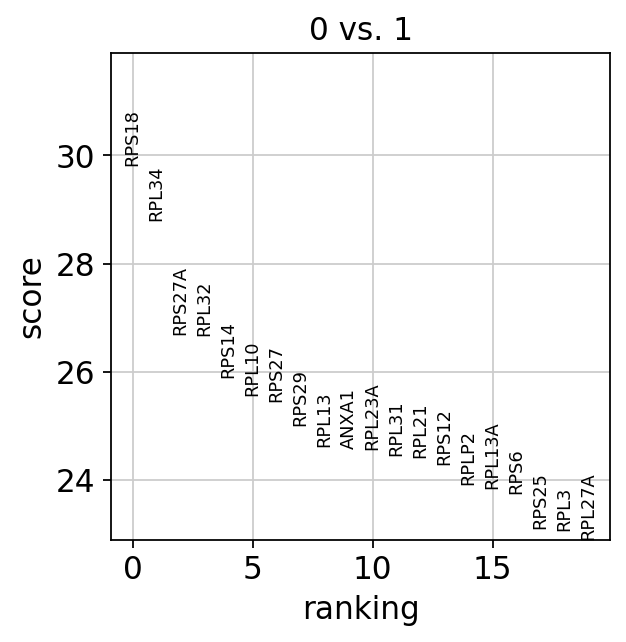

In [40]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

/home/josh/Downloads/yes/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


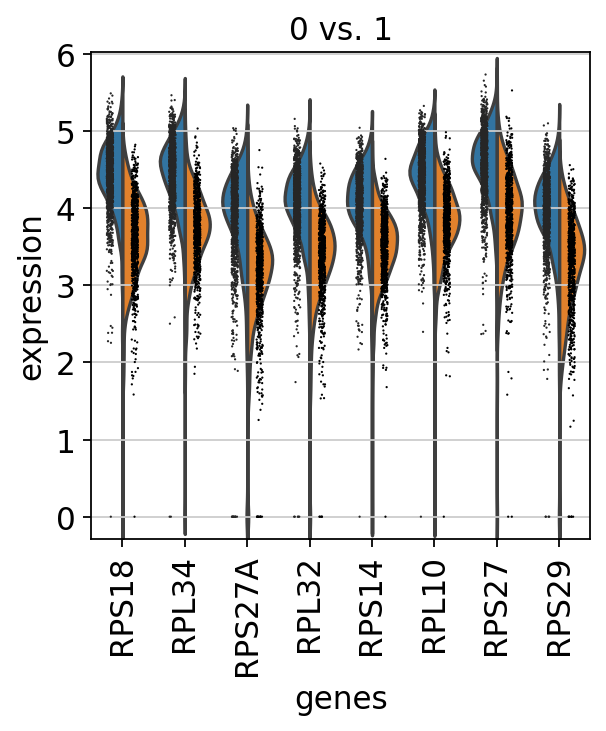

In [41]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

/home/josh/Downloads/yes/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


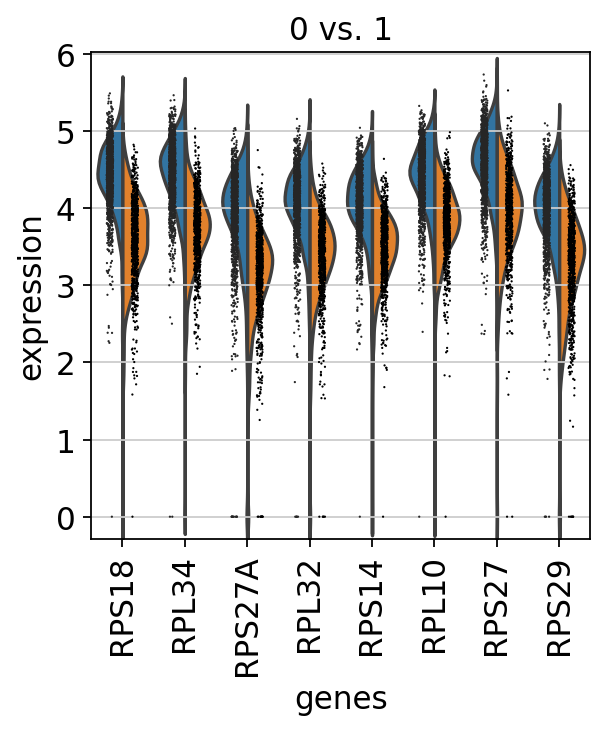

In [42]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

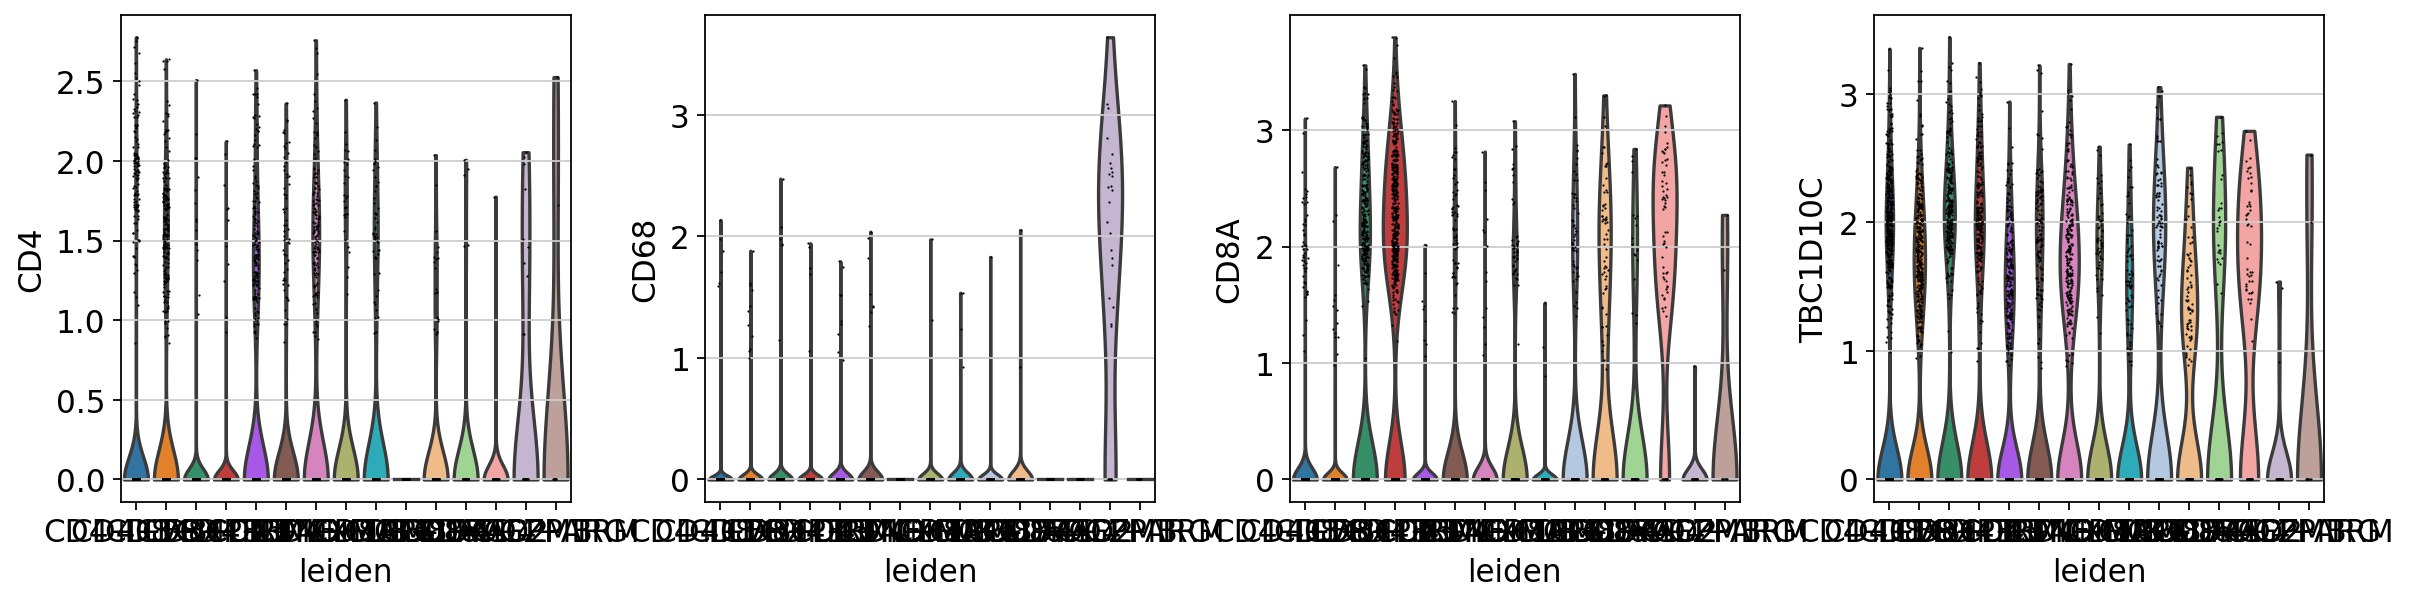

In [151]:
sc.pl.violin(adata, ['CD4', 'CD68', 'CD8A', 'TBC1D10C' ], groupby='leiden')

In [152]:
new_cluster_names = [
    'CD4+IL7R+', 'CD4+FOXP3',
    'CD8+ CCL5', 'CD8+ TRM',
    'CD4+ TNF', 'CD8+ TRM-GIMAP4',
    'CD4+ CXCL13', 'CD4+ RGCC',
    'CD4+ TRM-LAT', 'CD8+ CD69',
    'CD8+ TRAC', 'CD8+ CD2',
    'CD8+ GZMB', 'CD4+ CD68',
    'CD4+ TRM']
adata.rename_categories('leiden', new_cluster_names)

Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


/home/josh/Downloads/yes/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


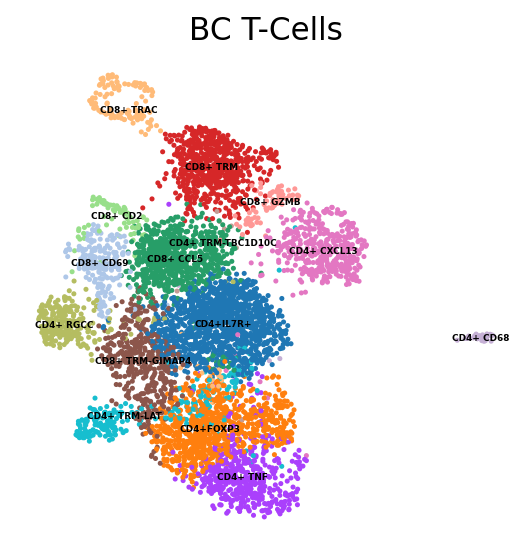

In [153]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='BC T-Cells', frameon=False, save='.pdf', legend_fontsize=4)


/home/josh/Downloads/yes/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


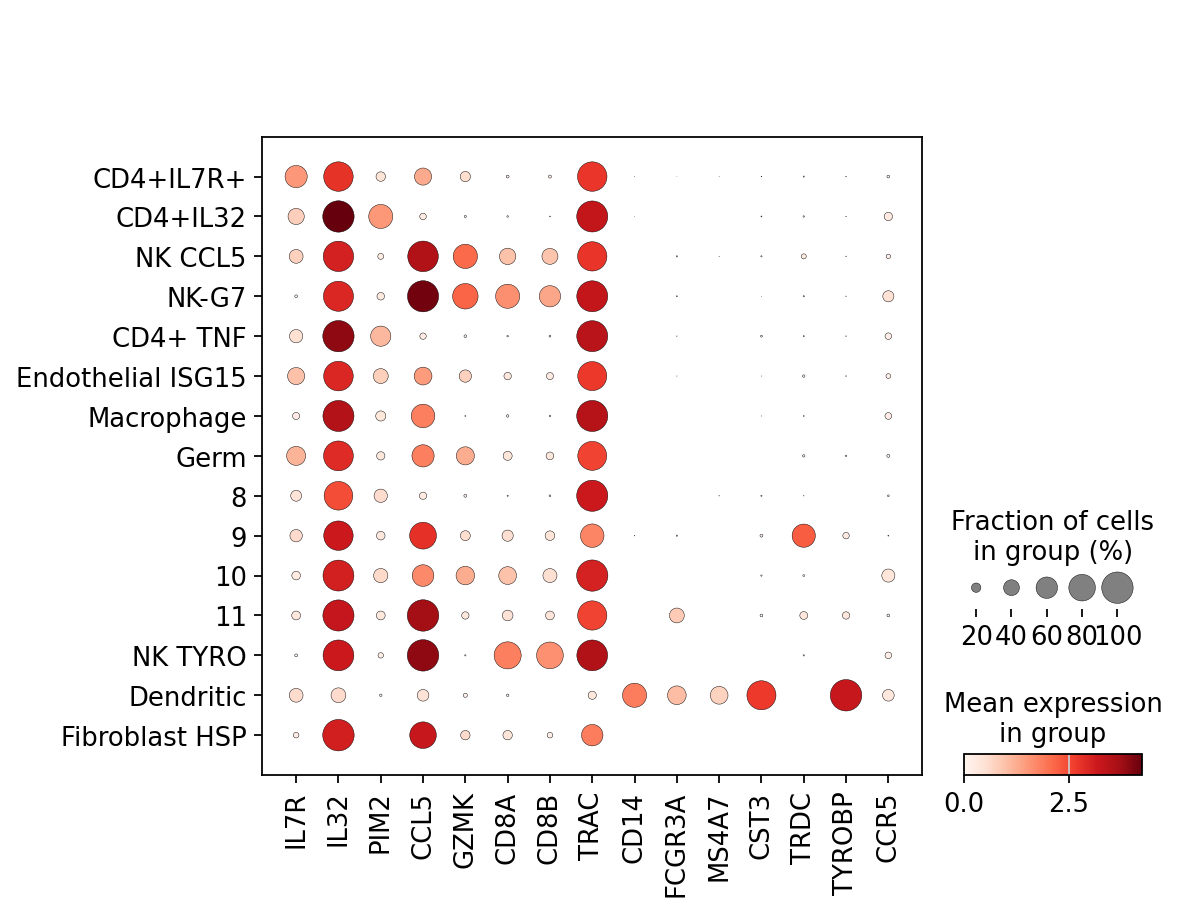

In [76]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');